In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Loading Smarket dataset
smarket = pd.read_csv('smarket.csv')  # load the dataset
smarket['Direction'] = np.where(smarket['Direction'] == 'Up', 1, 0) ## Convert 'Direction' to binary labels it will assign 1 when direction is up and 0 otherwise




In [ ]:
smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,1
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,1
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,0
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,1
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,0


# **Functions creation**

In [ ]:
# Function to compute logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Function to compute full gradient
def fullGradient(w, X, y):
    m=len(y)
    z = np.dot(X, w)
    p = logistic(z)
    gradient = (1/m)*np.dot(X.T, p - y)
    return gradient

# Function to compute stochastic gradient
def randGradient(w, X, y, n):   # where X,y are training data
    z = np.dot(X[n], w)
    p = logistic(z)
    gradient = np.dot(X[n].T, p - y[n])
    return gradient

# Function for gradient descent
def fdescent(X, y, job, nEpoch):
    N = len(y)
    d = X.shape[1]
    w = np.zeros(d)
    f_history = []

    def rho(t):
        return 1 / np.sqrt(t)

    if job == 'stochastic':
        for epoch in range(nEpoch):
            perm = np.random.permutation(N)
            for i in perm:
                gradient = randGradient(w, X, y, i)
                lr = rho(epoch * N + i + 1)
                w -= lr * gradient
                f = -np.mean(y * np.log(logistic(np.dot(X, w))) + (1 - y) * np.log(1 - logistic(np.dot(X, w))))
                f_history.append(f)
    elif job == 'full':
        for epoch in range(nEpoch):
            gradient = fullGradient(w, X, y)
            lr = rho(epoch * N + 1)
            w -= lr * gradient
            f = -np.mean(y * np.log(logistic(np.dot(X, w))) + (1 - y) * np.log(1 - logistic(np.dot(X, w))))
            f_history.append(f)

    return w, f_history



In [ ]:
# Prepare data
X = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5','Today', 'Volume']].values
X = np.hstack((np.ones((len(X), 1)), X))  # Add bias term
y = smarket['Direction'].values

# Split data into train and test sets based on years
X_train = smarket.loc[smarket['Year'] < 2005, ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Today', 'Volume']].values
y_train = smarket.loc[smarket['Year'] < 2005, 'Direction'].values
X_test = smarket.loc[smarket['Year'] == 2005, ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Today', 'Volume']].values
y_test = smarket.loc[smarket['Year'] == 2005, 'Direction'].values

# Add bias term
X_train = np.hstack((np.ones((len(X_train), 1)), X_train))
X_test = np.hstack((np.ones((len(X_test), 1)), X_test))



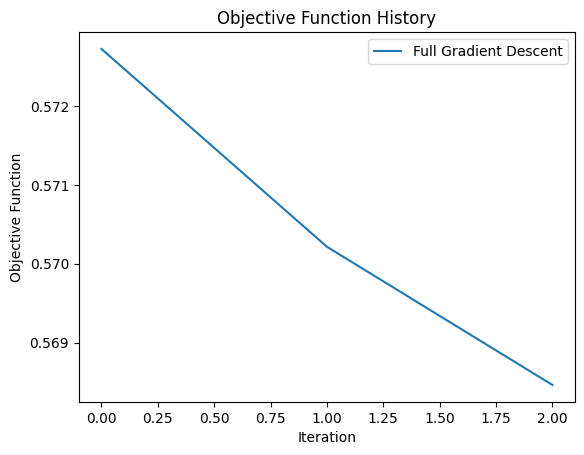

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train using full gradient descent
w_full, f_history_full = fdescent(X_train, y_train, 'full', 3)

# Train using stochastic gradient descent
w_stochastic, f_history_stochastic = fdescent(X_train, y_train, 'stochastic', 3)

# Plot histories of the objective function
plt.plot(f_history_full, label='Full Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Objective Function')
plt.title('Objective Function History')
plt.legend()
plt.show()



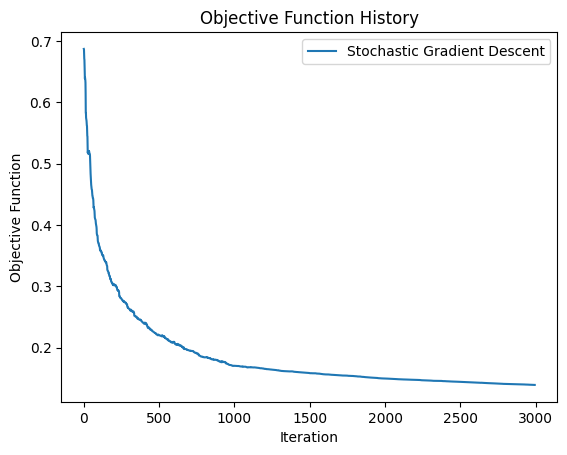

In [ ]:
# Plot histories of the objective function
plt.plot(f_history_stochastic, label='Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Objective Function')
plt.title('Objective Function History')
plt.legend()
plt.show()

In [ ]:
print("final w-vector for type-full is : ")
w_full

final w-vector for type-full is : 


array([  0.        , -15.80578107, -12.69834367,   2.8796878 ,
         2.83883257,  -0.94616002, 368.94578253,  -7.25058135])

In [ ]:
print("final w-vector for stochastic  is : ")

w_stochastic

final w-vector for stochastic  is : 


array([ 0.        , -0.0442941 , -0.10540901,  0.10311894, -0.01482448,
        0.12299957,  5.68723341, -0.00966351])

In [ ]:
# Function to predict probabilities and classifiers
def predict(X, w):
    probabilities = logistic(np.dot(X, w))
    classifiers = np.round(probabilities)
    return probabilities, classifiers

# Predict using full gradient descent
probabilities_full, classifiers_full = predict(X_test, w_full)

# Predict using stochastic gradient descent
probabilities_stochastic, classifiers_stochastic = predict(X_test, w_stochastic)

# Create table of predictions and actual directions
predictions_table = pd.DataFrame({
    'Probabilities (Full Gradient Descent)': probabilities_full,
    'Classifiers (Full Gradient Descent)': classifiers_full,
    'Probabilities (Stochastic Gradient Descent)': probabilities_stochastic,
    'Classifiers (Stochastic Gradient Descent)': classifiers_stochastic,
    'Actual Direction': y_test
})

# Count misclassified days
misclassified_full = np.sum(classifiers_full != y_test)
misclassified_stochastic = np.sum(classifiers_stochastic != y_test)

print("How many days were misclassified with modified and without modified data  ?")
print("Misclassified days (Full Gradient Descent):", misclassified_full)
print("Misclassified days (Stochastic Gradient Descent):", misclassified_stochastic)


# Modify the dataset for predicting the direction of the following day
smarket_modified = smarket.shift(-1)
smarket_modified.dropna(inplace=True)
X_modified = smarket_modified[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5','Today', 'Volume']].values
X_modified = np.hstack((np.ones((len(X_modified), 1)), X_modified))  # Add bias term
y_modified = smarket_modified['Direction'].values

# Standardize features
X_modified = scaler.transform(X_modified)

# Predict using full gradient descent
probabilities_full_modified, classifiers_full_modified = predict(X_modified, w_full)

# Predict using stochastic gradient descent
probabilities_stochastic_modified, classifiers_stochastic_modified = predict(X_modified, w_stochastic)

# Create table of predictions and actual directions for modified dataset
predictions_table_modified = pd.DataFrame({
    'Probabilities (Full Gradient Descent, Modified)': probabilities_full_modified,
    'Classifiers (Full Gradient Descent, Modified)': classifiers_full_modified,
    'Probabilities (Stochastic Gradient Descent, Modified)': probabilities_stochastic_modified,
    'Classifiers (Stochastic Gradient Descent, Modified)': classifiers_stochastic_modified,
    'Actual Direction (Modified)': y_modified
})

# Count misclassified days for modified dataset
misclassified_full_modified = np.sum(classifiers_full_modified != y_modified)
misclassified_stochastic_modified = np.sum(classifiers_stochastic_modified != y_modified)

print("Misclassified days (Full Gradient Descent, Modified):", misclassified_full_modified)
print("Misclassified days (Stochastic Gradient Descent, Modified):", misclassified_stochastic_modified)


How many days were misclassified with modified and without modified data  ?
Misclassified days (Full Gradient Descent): 15
Misclassified days (Stochastic Gradient Descent): 3
Misclassified days (Full Gradient Descent, Modified): 37
Misclassified days (Stochastic Gradient Descent, Modified): 16


<ipython-input-4-c36a8fcaea16>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [ ]:
predictions_table

,Probabilities (Full Gradient Descent),Classifiers (Full Gradient Descent),Probabilities (Stochastic Gradient Descent),Classifiers (Stochastic Gradient Descent),Actual Direction
0,3.089200e-98,0.0,0.022176,0.0,0
1,1.052285e-149,0.0,0.004990,0.0,0
2,3.191739e-42,0.0,0.168694,0.0,0
3,1.000000e+00,1.0,0.839756,1.0,1
4,4.515869e-24,0.0,0.320003,0.0,0
...,...,...,...,...,...
247,2.672662e-05,0.0,0.529492,1.0,1
248,5.020486e-126,0.0,0.011068,0.0,0
249,1.000000e+00,1.0,0.657899,1.0,1
250,2.512814e-36,0.0,0.217154,0.0,0


In [ ]:
predictions_table_modified

,"Probabilities (Full Gradient Descent, Modified)","Classifiers (Full Gradient Descent, Modified)","Probabilities (Stochastic Gradient Descent, Modified)","Classifiers (Stochastic Gradient Descent, Modified)",Actual Direction (Modified)
0,1.000000e+00,1.0,0.990243,1.0,1.0
1,1.635885e-91,0.0,0.037993,0.0,0.0
2,1.000000e+00,1.0,0.944444,1.0,1.0
3,1.000000e+00,1.0,0.756458,1.0,1.0
4,1.000000e+00,1.0,0.998358,1.0,1.0
...,...,...,...,...,...
1244,2.672662e-05,0.0,0.529492,1.0,1.0
1245,5.020486e-126,0.0,0.011068,0.0,0.0
1246,1.000000e+00,1.0,0.657899,1.0,1.0
1247,2.512814e-36,0.0,0.217154,0.0,0.0


In [ ]:
#removing 'year' column
smarket.drop(columns='Year',inplace=True)
smarket.to_csv('dfd.csv' , index=False)
dd=pd.read_csv('dfd.csv')

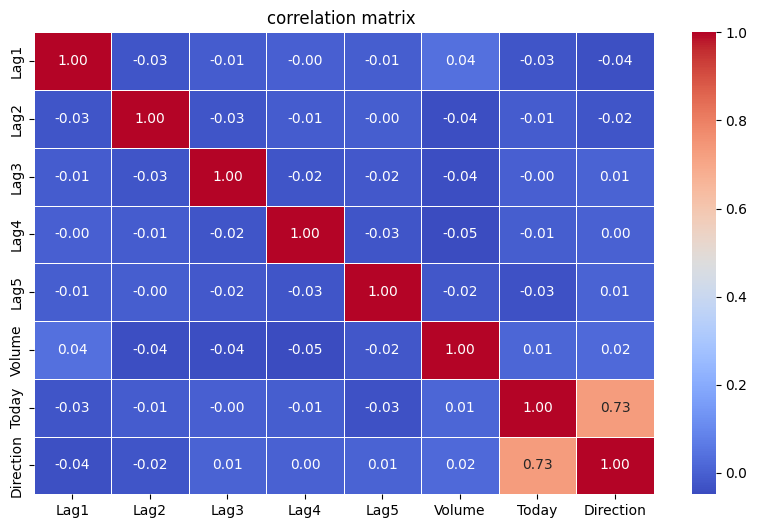

In [ ]:
#correlation matrix

corr=smarket.corr()

import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True , cmap='coolwarm' , fmt=".2f" ,linewidths=0.5 )
plt.title("correlation matrix ")
plt.show()

# **Q1. Which variables show a significant correlation?**

from correlation matrix , we examined that realtion between  Today Vs direction has greater impact than others.



# **Q2. Which methods gives better results and which method uses fewer floating point operations?**

We observe that Stochastic Gradient Descent outperforms Full Gradient Descent in terms of misclassification rate on the test set, with significantly fewer misclassified days. Therefore, for this particular dataset and configuration, Stochastic Gradient Descent gives better results.

Regarding the number of floating-point operations, Stochastic Gradient Descent typically uses fewer operations per iteration compared to Full Gradient Descent since it computes the gradient for a single data point at a time rather than the entire dataset. However, Full Gradient Descent may require fewer iterations to converge.







# **Q3. Is this a get rich quick scheme?**

No, the provided code is not a get-rich-quick scheme.  It's essential to understand that investing in the stock market involves risks, and no algorithm can guarantee success or instant wealth. Predictive models, including those based on machine learning, are tools that aid decision-making, but they should be used cautiously and alongside other factors such as fundamental analysis, market research, and risk management strategies.